In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTTools import remove_special
from hypernetworks.utils.HTGraph import draw_hn

from IPython.display import Image

parser = load_parser()

pictures_dir="pictures/"

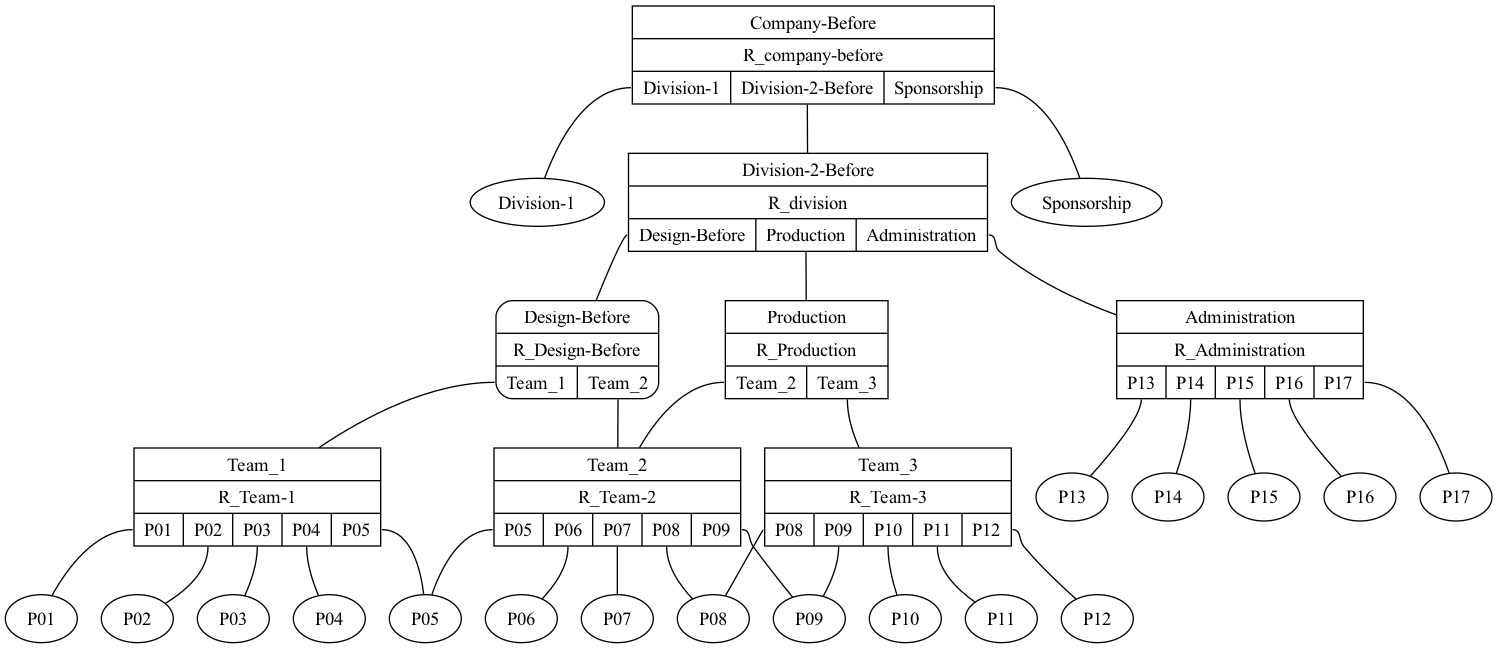

In [2]:
hn_before = Hypernetwork()

compile_hn(hn_before, parser, """
    Company-Before=<Division-1, Division-2-Before, Sponsorship; R_company-before>
    Division-2-Before=<Design-Before, Production, Administration; R_division>
    Design-Before={Team_1, Team_2; R_Design-Before}
    Production=<Team_2, Team_3; R_Production>

    Team_1 = <P01, P02, P03, P04, P05; R_Team-1>
    Team_2=<P05, P06, P07, P08, P09; R_Team-2>
    Team_3=<P08, P09, P10, P11, P12; R_Team-3>
    Administration=<P13, P14, P15, P16, P17; R_Administration>
""")

draw_hn(hn_before, fname=pictures_dir+"before-company-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"before-company-hn.png", width=1000, height=1200)

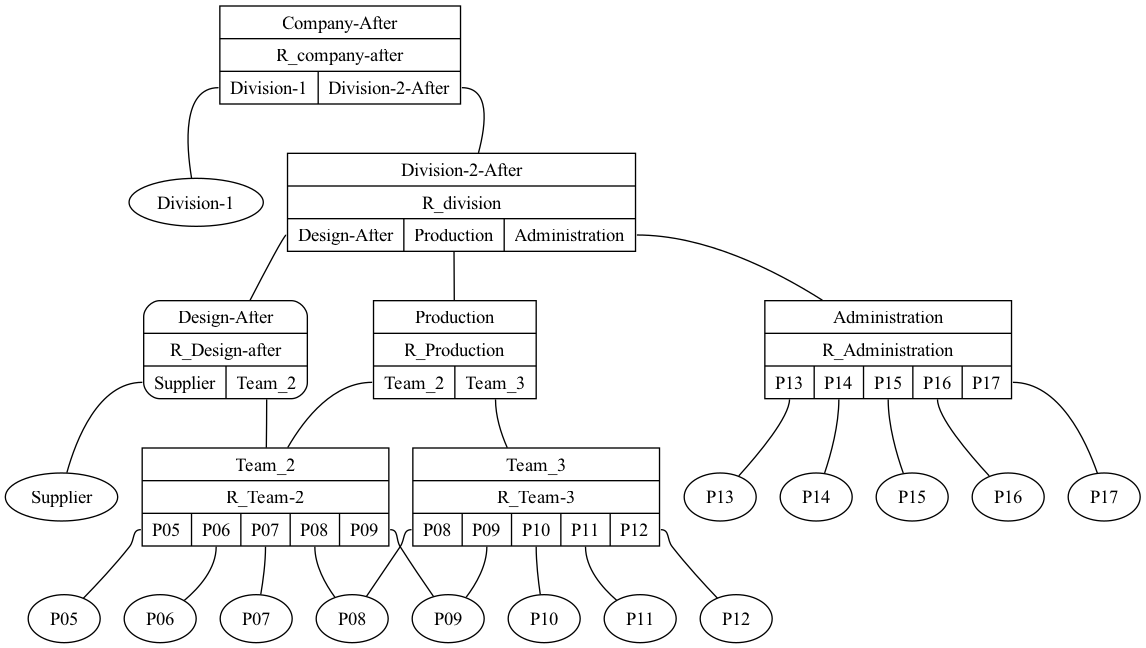

In [3]:
hn_after = Hypernetwork()

compile_hn(hn_after, parser, """
    Company-After=<Division-1, Division-2-After; R_company-after>
    Division-2-After=<Design-After, Production, Administration; R_division>
    Design-After={Supplier, Team_2; R_Design-after}
    Production=<Team_2, Team_3; R_Production>
    
    Team_2=<P05, P06, P07, P08, P09; R_Team-2>
    Team_3=<P08, P09, P10, P11, P12; R_Team-3>
    Administration=<P13, P14, P15, P16, P17; R_Administration>
""")

draw_hn(hn_after, fname=pictures_dir+"after-company-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"after-company-hn.png", width=1000, height=1200)

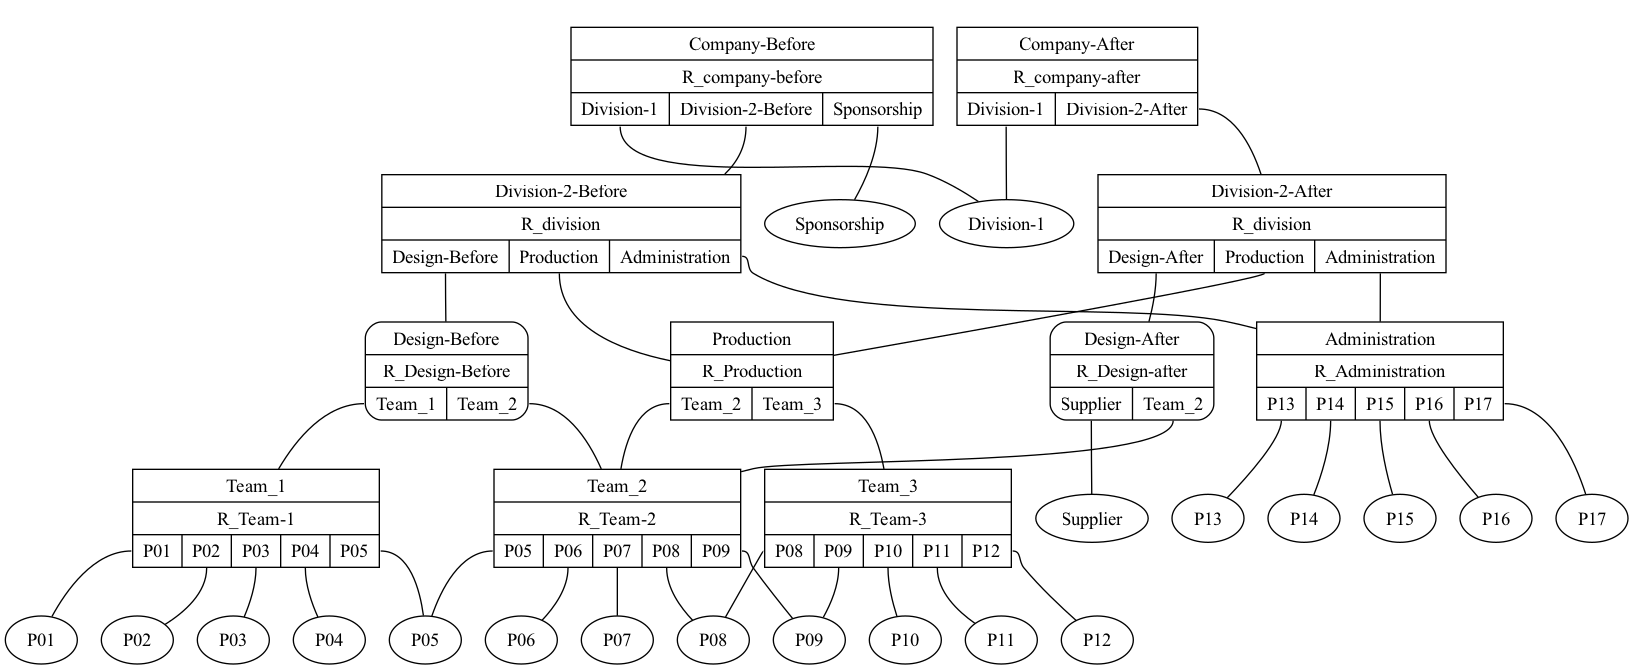

In [6]:
hn_before_and_after = Hypernetwork()

hn_before_and_after.union(hn_before)
hn_before_and_after.union(hn_after)

draw_hn(hn_before_and_after, fname=pictures_dir+"before-and-after-company-hn", view=False, show_hstype=False, fiddle_order=True)
Image(filename=pictures_dir+"before-and-after-company-hn.png", width=1400, height=1200)

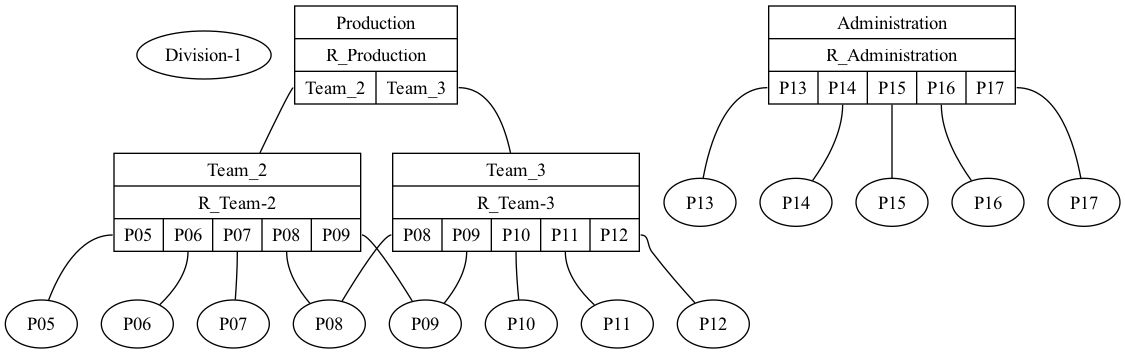

In [5]:
hn_intersection = Hypernetwork()

hn_intersection.copy(hn_before)
hn_intersection.intersection(hn_after)

draw_hn(hn_intersection, fname=pictures_dir+"intersection-company-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"intersection-company-hn.png", width=1000, height=1200)